# Tutorial 2: Exploring Spreadsheets and Tables with Pandas

In this class, we will be working with data stored in spreadsheets and tables. These files may come in different formats, such as Excel CSV (Comma Separated Values) files, text files (.txt), or other types of data files (.xlsx, for examample). 

In this tutorial, we will learn all the basics of working with spreadsheets and tables in Python using the **pandas** package. By the end of this tutorial, you will be able to:
* open and read existing .csv files (the process is the same for .txt files)
* practice the steps of data collection, screening, and exploration
* perform basic mathematical operations on DataFrame data
* visualize and interpret data, and save the plot

### What is pandas?

The pandas package is a Python package that specifically analyzes and manipulates data in 2D or 1D arrays. Basically, pandas is the go-to tool for looking at data in a table (2D) or list (1D) format. Of course, there is some special vocab to learn with pandas (or any Python package). 

In an Excel file, a 2D array is called a spreadsheet. In pandas, these 2D arrays are called *DataFrames*. pandas also has a name for a 1D array: a *Series*. Certain commands only work on Series and not DataFrames, or vice versa, so it is important to know which kind of object you are working with.

**Note:** the package name pandas is always lowercase. This is a purposeful decision by the creators of pandas. Other Python packages have funny upper- and lowercasing, too!

Remember, as with any Python package, you must import your package before using.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # we'll be looking at our data, so we'll import pyplot here as well

### Opening files with pandas

Whether your data is in html, csv, json, or xlsx, pandas can open that! Here is a comprehensive list of all file types pandas can open and read: https://pandas.pydata.org/docs/reference/io.html. User Guide for pandas can be found via https://pandas.pydata.org/docs/index.html

#### <font color=red> Data Science Life Cycle Step 1: Data Collection

🗂 The data we’re using can be downloaded from: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND.

Here are two examples you can try (step-by-step download options are included):

Example 1: "LAHORE_PK.csv"
- **Select Weather Observation Type/Dataset**: Daily Summaries
- **Select Date Range**: 2023-06-01 to 2023-08-31
- **Search For**: Cities
- **Enter a Search Term**: Lahore
- Click **Search**
- From the list that appears, **Add to Cart**: Lahore, PK

Example 2: "PHILADELPHIA_US.csv"
- **Select Weather Observation Type/Dataset**: Daily Summaries
- **Select Date Range**: 2023-06-01 to 2023-08-31
- **Search For**: Cities
- **Enter a Search Term**: Philadelphia  
- Click **Search**
- From the list that appears, **Add to Cart**: Philadelphia, PA US 

When you’re ready to download, move your mouse pointer to the Cart icon at the top right of the page and follow the download instructions.

In [3]:
# names of files to open
csvfile_pk = 'LAHORE_PK.csv' 
csvfile_pa = 'PHILADELPHIA_US.csv'

Before we open these files with pandas, pause for a moment and open one of them using Excel or TextEditor and just see what it looks like. This way, you can check if the pandas version is consistent with the native file.

In [4]:
# use the read_csv command to open the files as a dataframe. 
# see more about dataframe: 
#                          https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
# note: this command also works for .txt files
df_pk = pd.read_csv(csvfile_pk, sep=',')
df_pa = pd.read_csv(csvfile_pa, sep=',')
# the sep=',' argument refers to the separator between data, meaning that values in the file are separated by ",".

Let’s start by taking a look at the station data for Lahore, Pakistan (LAHORE, PK).

### LAHORE, PK

In [5]:
# check out each DataFrame. You don't need to use the print command here.
df_pk

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES
0,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-06-01,0.05,",,S",86.0,",,S"
1,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-06-02,0.02,",,S",89.0,",,S"
2,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-06-03,0.00,",,S",96.0,",,S"
3,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-06-04,0.00,",,S",101.0,",,S"
4,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-06-05,0.00,",,S",100.0,",,S"
...,...,...,...,...,...,...,...,...,...,...
87,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-08-27,0.00,",,S",95.0,",,S"
88,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-08-28,0.80,",,S",94.0,",,S"
89,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-08-29,0.01,",,S",95.0,",,S"
90,PK000041640,"LAHORE CITY, PK",31.55,74.333,215.0,2023-08-30,0.00,",,S",97.0,",,S"


Success! We’ve successfully opened each file.

In [6]:
# rememeber that series is the data structure for a single column of a DataFrame, 
# a one-dimensional labeled array capable of holding any data type.
PRCP_pk = df_pk['PRCP']
TMAX_pk = df_pk['TMAX']
DATE_pk = df_pk['DATE']  
PRCP_pk

0     0.05
1     0.02
2     0.00
3     0.00
4     0.00
      ... 
87    0.00
88    0.80
89    0.01
90    0.00
91    0.00
Name: PRCP, Length: 92, dtype: float64

#### <font color=red> Data Science Life Cycle Step 2: Data Cleaning

Now, following the data science life cycle we discussed in class, our next step is to do a pre-assessment. This means checking the data to see if any cleaning is needed, such as fixing missing values, duplicates, or other errors.

Check how many weather stations are included within the city by using the .unique() command.

In [7]:
# check the unique station IDs without replication
# see https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html#pandas.Series.unique
print(df_pk['STATION'].unique())

['PK000041640']


Let’s check if there are any missing values in our dataset. We’ll use the .isnull() function to identify missing data (https://pandas.pydata.org/docs/reference/api/pandas.Series.isnull.html#pandas.Series.isnull)
and then sum up the number of days with missing data during the summer using .sum() (https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html#pandas.Series.sum)

**Note**: Both functions are applied to a Series (https://pandas.pydata.org/docs/user_guide/dsintro.html#series), so we first need to select the column (variable) we want to check. Since we’re focusing on variables related to heat and floods, we will check:

Daily maximum temperature (the **TMAX** column)

Precipitation (the **PRCP** column)

You can view all rows in DataFrame by changing the display setting below.
👉 Note: By default, pandas only shows 10 rows.

In [8]:
pd.set_option('display.max_rows', 92) 
PRCP_pk
# after displaying all the rows, remember to change the setting back to 10 to save space 
# and keep your output manageable.

0     0.05
1     0.02
2     0.00
3     0.00
4     0.00
5     0.00
6     1.18
7     0.00
8     0.00
9     0.00
10    0.12
11    0.00
12    0.00
13    0.08
14    0.00
15    0.05
16    0.00
17    0.00
18    0.18
19    0.00
20    0.00
21    0.00
22    0.00
23     NaN
24    0.00
25    6.37
26    0.40
27    0.00
28    0.00
29    0.24
30    0.00
31    0.00
32    0.00
33    0.93
34    3.70
35    2.34
36    0.44
37    0.84
38    0.10
39    0.00
40    0.00
41    0.00
42    0.00
43    0.00
44    0.00
45    0.00
46    0.00
47    0.00
48    0.00
49    0.91
50    0.32
51    0.27
52    4.17
53    0.00
54    0.02
55    0.02
56    1.68
57    0.14
58    0.00
59    1.34
60    0.00
61    0.39
62    0.00
63    0.00
64    0.00
65    0.00
66    0.00
67    0.00
68    0.00
69    0.00
70    0.00
71    0.09
72    0.00
73    0.00
74    0.00
75    0.00
76    0.00
77    0.00
78    0.00
79    0.00
80    0.02
81    0.00
82    0.00
83    0.00
84    0.00
85    0.43
86    1.33
87    0.00
88    0.80
89    0.01
90    0.00

Notice that there is a NaN (missing value) at index 23. In Python, NaN means Not a Number. It is a placeholder for missing data. If there are a lot of NaNs in your DataFrame, it can be a pain to remove them one by one.

In [9]:
# check if PRCP/TMAX has any columns with missing values (i.e., NAN)
print("PRCP: ", PRCP_pk.isnull().sum())
print("TMAX: ",TMAX_pk.isnull().sum())

PRCP:  1
TMAX:  10


Now, let’s take it a step further and calculate the percentage of missing values.

This will help us assess whether the amount of missing data is too large compared to the total number of records in our dataset.

In [10]:
# this is the total number of rows in the entire dataset (because there is only one station)
length_pk = len(df_pk.index)
print(length_pk)

# this This calculates the number of missing values divided by the total number of entries, 
# giving us the proportion of missing data
print("PRCP: ", PRCP_pk.isnull().sum()/len(df_pk.index) * 100)
print("TMAX: ", TMAX_pk.isnull().sum()/len(df_pk.index) * 100)

92
PRCP:  1.0869565217391304
PRCP:  10.869565217391305


The missing data <15% should still be manageable. If more than 15% – 20% missing data, it may be problematic to require careful consideration.

#### <font color=red> Data Science Life Cycle Step 3: Data Exploration

Now, let’s do some basic statistical calculations with our data to better understand it. See pandas.Series operations https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [11]:
# calculate mean (excluding missing values)
PRCP_pk_mean = PRCP_pk.mean(skipna=True) # By default, skipna=True, even if it is not explicitly specified.
TMAX_pk_mean = TMAX_pk.mean(skipna=True)
print("PRCP_pk_mean: ", PRCP_pk_mean)
print("TMAX_pk_mean: ", TMAX_pk_mean)

PRCP_pk_mean:  0.31846153846153846
TMAX_pk_mean:  96.98780487804878


In [12]:
# calculate standard deviation
PRCP_pk_std = PRCP_pk.std(skipna=True)
TMAX_pk_std = TMAX_pk.std(skipna=True)
print("PRCP_pk_std: ", PRCP_pk_std)
print("TMAX_pk_std: ", TMAX_pk_std)

PRCP_pk_std:  0.941283902239587
TMAX_pk_std:  4.7414481885200805


In [13]:
# Calculate sum 
PRCP_pk_sum = PRCP_pk.sum(skipna=True)
print("PRCP_pk_sum: ", PRCP_pk_sum)

PRCP_pk_sum:  28.98


In [14]:
# Calculate maximum
PRCP_pk_max = PRCP_pk.max(skipna=True)
PRCP_pk_max_idx = PRCP_pk.argmax(skipna=True) # Return int position of the largest value in the Series.
TMAX_pk_max = TMAX_pk.max(skipna=True)
TMAX_pk_max_idx = TMAX_pk.argmax(skipna=True)
print("PRCP_pk_max: ", PRCP_pk_max)
print("PRCP_pk_max_index: ", PRCP_pk_max_idx, " Date: ", DATE_pk[PRCP_pk_max_idx])
print("TMAX_pk_max: ", TMAX_pk_max)
print("TMAX_pk_max_index: ", TMAX_pk_max_idx, " Date: ", DATE_pk[TMAX_pk_max_idx])

PRCP_pk_max:  6.37
PRCP_pk_max_index:  25  Date:  2023-06-26
TMAX_pk_max:  107.0
TMAX_pk_max_index:  22  Date:  2023-06-23


In [15]:
# Calculate minimum
TMAX_pk_min = TMAX_pk.min(skipna=True)
TMAX_pk_min_idx = TMAX_pk.argmin(skipna=True)
print("TMAX_pk_min: ", TMAX_pk_min)
print("TMAX_pk_min_index: ", TMAX_pk_min_idx, " Date: ", DATE_pk[TMAX_pk_min_idx])

TMAX_pk_min:  81.0
TMAX_pk_min_index:  34  Date:  2023-07-05


Next, let's do a time series visulization using matplotlib. let’s create a time series data visualization using Matplotlib.

Did you know? Pandas also has a built-in plot function that can be used directly on either a Series or a DataFrame to quickly create plots (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

<Axes: title={'center': 'Lahore, PK'}>

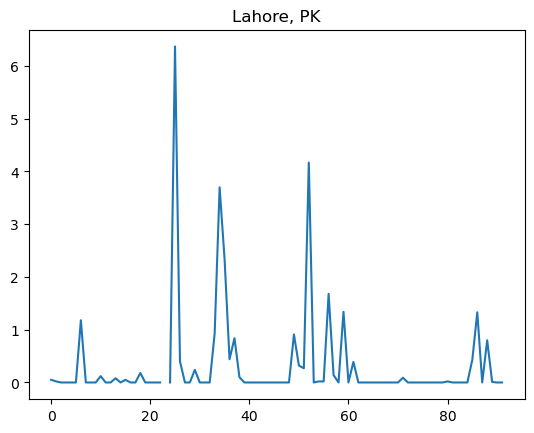

In [16]:
# plot with pandas.DataFrame.plot()
PRCP_pk.plot(kind='line', title="Lahore, PK")

The plot above was quick and easy to create. However, if we want to make more customized and visually nice plots, it’s better to use Matplotlib.

So, let’s move on and create our plots using Matplotlib (https://matplotlib.org/stable/api/pyplot_summary.html) for more control and flexibility.

Text(0.5, 1.0, 'Lahore, PK')

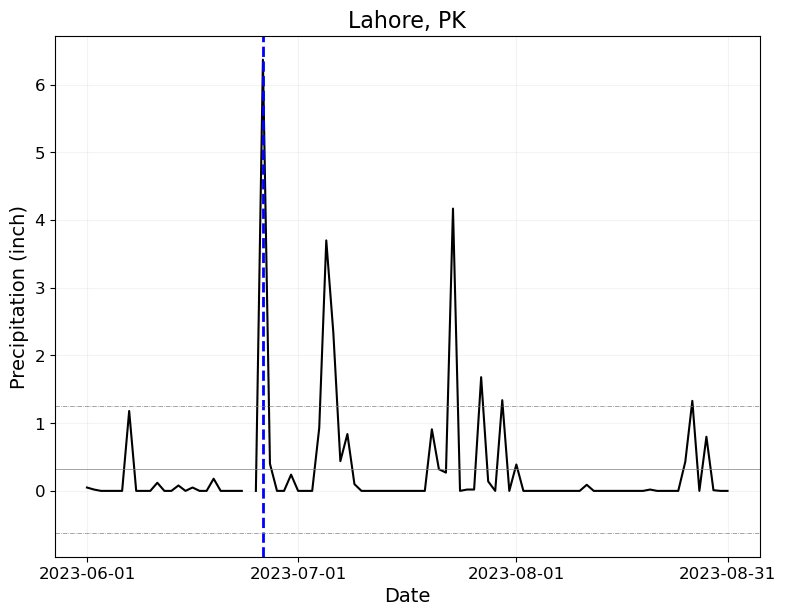

In [17]:
# select only x ticks and ticklabels at the start of each month
x_ticks = [0, 30, 61, 91] 
x_tlabels = [DATE_pk[k] for k in x_ticks]

##################### plot precipitation ##################### 
# fig (Figure): refers to the entire window or canvas that contains all the elements of your visualization. 
# ax (Axes): represents a single subplot within the Figure. 
#            If you have multiple subplots within one Figure, each subplot will correspond to a distinct Axes object.
# figsize: adjust the overall size of the plot, specifically its width and height in inches.
fig, ax = plt.subplots(figsize=(8, 6))       # By default, there is only one subplot (nrows=1, ncols=1)

# plot type
ax.plot(DATE_pk, PRCP_pk, color="black")        # Line plot
# ax.scatter(DATE_pk, PRCP_pk, color="black")    # Scatter plot

# plot settings
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tlabels, ha='center')
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Date', size=14)
ax.set_ylabel('Precipitation (inch)', size=14)
ax.grid(True, alpha=0.15)

# plot date with the maximum precipitation
ax.axvline(x=PRCP_pk_max_idx, color='blue', linestyle='--', linewidth=2)

# plot mean and mean +- one standard deviation of precipitation
ax.axhline(y=PRCP_pk_mean, color='gray', linestyle='-', linewidth=0.5)
ax.axhline(y=PRCP_pk_mean + PRCP_pk_std, color='gray', linestyle='-.', linewidth=0.5)
ax.axhline(y=PRCP_pk_mean - PRCP_pk_std, color='gray', linestyle='-.', linewidth=0.5)
fig.tight_layout()

plt.title("Lahore, PK", size=16)

# save plot
# plt.savefig('Lahore_PK_PRCP.png', format='png', dpi=600, bbox_inches='tight') 

That looks much better, right? Now, let’s take it one step further. We’re going to create two subplots:

- One for precipitation, and

- One for daily maximum temperature.

We’ll arrange them in two rows and one column, and they will share the same x-axis, which is the time period. Let’s do it!

Text(0.5, 0.98, 'Lahore, PK')

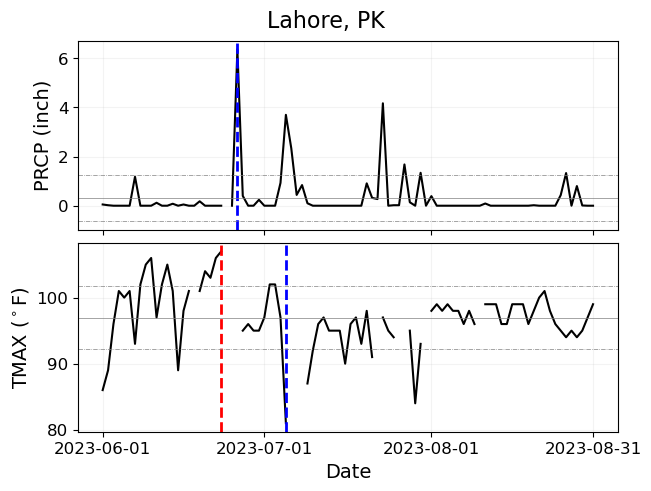

In [18]:
fig, [ax1, ax2] = plt.subplots(2, 1, layout='constrained', sharex=True)

# Select only x ticks and ticklabels at the start of each month
x_ticks = [0, 30, 61, 91] 
x_tlabels = [DATE_pk[k] for k in x_ticks]

## ------------- plot precipitation ------------ ##
ax1.plot(DATE_pk, PRCP_pk, color="black")       # Line plot
# ax1.scatter(DATE_pk, PRCP_pk, color="black")    # Scatter plot
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tlabels, ha='center')
ax1.tick_params(axis='both', labelsize=12)
# ax1.set_xlabel('Date', size=14)
ax1.set_ylabel('PRCP (inch)', size=14)
ax1.grid(True, alpha=0.15)

# plot date with the maximum precipitation
ax1.axvline(x=PRCP_pk_max_idx, color='blue', linestyle='--', linewidth=2)

# plot mean and mean +- one standard deviation of precipitation
ax1.axhline(y=PRCP_pk_mean, color='gray', linestyle='-', linewidth=0.5)
ax1.axhline(y=PRCP_pk_mean + PRCP_pk_std, color='gray', linestyle='-.', linewidth=0.5)
ax1.axhline(y=PRCP_pk_mean - PRCP_pk_std, color='gray', linestyle='-.', linewidth=0.5)

## ------------- plot daily maximum temperature ------------ ##
ax2.plot(DATE_pk, TMAX_pk, color="black")       # Line plot
# ax2.scatter(DATE_pk, TMAX_pk, color="black")    # Scatter plot
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tlabels, ha='center')
ax2.tick_params(axis='both', labelsize=12)
ax2.set_xlabel('Date', size=14)
ax2.set_ylabel('TMAX ($^\circ$F)', size=14)
ax2.grid(True, alpha=0.15)

# plot date with the maximum and minimum daily maximum temperature
ax2.axvline(x=TMAX_pk_max_idx, color='red', linestyle='--', linewidth=2)
ax2.axvline(x=TMAX_pk_min_idx, color='blue', linestyle='--', linewidth=2)

# plot mean and mean +- one standard deviation of daily maximum temperature
ax2.axhline(y=TMAX_pk_mean, color='gray', linestyle='-', linewidth=0.5)
ax2.axhline(y=TMAX_pk_mean + TMAX_pk_std, color='gray', linestyle='-.', linewidth=0.5)
ax2.axhline(y=TMAX_pk_mean - TMAX_pk_std, color='gray', linestyle='-.', linewidth=0.5)

# add a "super title" to a figure, which is a title that spans across all subplots within that figure
plt.suptitle("Lahore, PK", size=16)

# save plot
# plt.savefig('Lahore_PK_PRCP_TMAX.png', format='png', dpi=600, bbox_inches='tight') 

What do you notice about the relationship between precipitation and daily maximum temperature in the data?

👉 For example, does one increase when the other decreases?
👉 Are there any patterns that stand out to you?

Next, let’s repeat the same analysis for the station(s) in Philadelphia, PA.

### PHILADELPHIA, US

In [19]:
# check out each DataFrame. 
df_pa

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES
0,US1PAPH0012,"PHILADELPHIA 2.1 NE, PA US",40.031559,-75.110199,20.7,2023-06-01,0.00,",,N",NaN,NaN
1,US1PAPH0012,"PHILADELPHIA 2.1 NE, PA US",40.031559,-75.110199,20.7,2023-06-02,0.00,",,N",NaN,NaN
2,US1PAPH0012,"PHILADELPHIA 2.1 NE, PA US",40.031559,-75.110199,20.7,2023-06-03,0.04,",,N",NaN,NaN
3,US1PAPH0012,"PHILADELPHIA 2.1 NE, PA US",40.031559,-75.110199,20.7,2023-06-04,0.00,",,N",NaN,NaN
4,US1PAPH0012,"PHILADELPHIA 2.1 NE, PA US",40.031559,-75.110199,20.7,2023-06-05,0.00,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
556,USC00366878,"PHILADELPHIA CENTER CITY, PA US",39.960560,-75.142630,4.9,2023-08-27,NaN,NaN,NaN,NaN
557,USC00366878,"PHILADELPHIA CENTER CITY, PA US",39.960560,-75.142630,4.9,2023-08-28,NaN,NaN,NaN,NaN
558,USC00366878,"PHILADELPHIA CENTER CITY, PA US",39.960560,-75.142630,4.9,2023-08-29,NaN,NaN,NaN,NaN
559,USC00366878,"PHILADELPHIA CENTER CITY, PA US",39.960560,-75.142630,4.9,2023-08-30,NaN,NaN,NaN,NaN


In [20]:
# Select 'PRCP' and 'TMAX' as a Series
PRCP_pa = df_pa['PRCP']
TMAX_pa = df_pa['TMAX']
DATE_pa = df_pa['DATE']
PRCP_pa

0      0.00
1      0.00
2      0.04
3      0.00
4      0.00
       ... 
556     NaN
557     NaN
558     NaN
559     NaN
560     NaN
Name: PRCP, Length: 561, dtype: float64

#### <font color=red> Data Science Life Cycle Step 2: Data Cleaning

In [21]:
# check the unique station IDs without replication
print(df_pa['STATION'].unique())

['US1PAPH0012' 'USW00013739' 'US1PAPH0030' 'US1PAPH0008' 'USW00094732'
 'USC00366886' 'USC00366878']


Hmm, it looks like there are multiple stations found within Philadelphia. This makes things a bit more complicated.

However, we can use the .groupby() function on the “STATION” column, which will allow us to perform calculations for each station separately, just like we did for LAHORE_PK.

In [22]:
# check if PRCP/TMAX has any columns with missing values (i.e., NAN)
print("PRCP: ", PRCP_pa.isnull().groupby(df_pa['STATION']).sum())
print("TMAX: ",TMAX_pa.isnull().groupby(df_pa['STATION']).sum())

PRCP:  STATION
US1PAPH0008     1
US1PAPH0012     1
US1PAPH0030     0
USC00366878    92
USC00366886    48
USW00013739     0
USW00094732     2
Name: PRCP, dtype: int64
TMAX:  STATION
US1PAPH0008    22
US1PAPH0012    88
US1PAPH0030    83
USC00366878    92
USC00366886     0
USW00013739     0
USW00094732     0
Name: TMAX, dtype: int64


Before calculating the proportion of missing data, we need to take one more step:

Let’s check the number of days recorded for each station to see if there are any missing dates already missing from the station data itself.

In [23]:
df_pa.groupby(['STATION']).size()

STATION
US1PAPH0008    22
US1PAPH0012    88
US1PAPH0030    83
USC00366878    92
USC00366886    92
USW00013739    92
USW00094732    92
dtype: int64

In [24]:
# Check "STATION = US1PAPH0008" with far less dates avaiable
df_pa[df_pa['STATION'] == "US1PAPH0008"]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES
263,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-01,0.0,",,N",NaN,NaN
264,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-02,0.0,",,N",NaN,NaN
265,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-03,0.0,",,N",NaN,NaN
266,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-04,0.0,",,N",NaN,NaN
267,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-06,0.0,",,N",NaN,NaN
268,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-09,0.0,",,N",NaN,NaN
269,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-11,NaN,NaN,NaN,NaN
270,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-12,0.0,",,N",NaN,NaN
271,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-13,0.0,",,N",NaN,NaN
272,US1PAPH0008,"PHILADELPHIA 2.7 WNW, PA US",40.025,-75.18,73.5,2023-08-14,0.0,",,N",NaN,NaN


Now that we have a better understanding of what our data looks like, let’s move on to calculating the proportion of missing data.

In [25]:
# calculates the proportion of missing data
# note that there might be missing days 

print("PRCP: ", PRCP_pa.isnull().groupby(df_pa['STATION']).sum()/df_pa.groupby(['STATION']).size() * 100)
print('-------------------------------------------------------------')
print("TMAX: ", TMAX_pa.isnull().groupby(df_pa['STATION']).sum()/df_pa.groupby(['STATION']).size() * 100)

PRCP:  STATION
US1PAPH0008      4.545455
US1PAPH0012      1.136364
US1PAPH0030      0.000000
USC00366878    100.000000
USC00366886     52.173913
USW00013739      0.000000
USW00094732      2.173913
dtype: float64
-------------------------------------------------------------
TMAX:  STATION
US1PAPH0008    100.0
US1PAPH0012    100.0
US1PAPH0030    100.0
USC00366878    100.0
USC00366886      0.0
USW00013739      0.0
USW00094732      0.0
dtype: float64


Based on the proportion of missing data for both PRCP and TMAX, it looks like only “STATION = USW00013739” and “STATION = USW00094732” have enough complete data to be suitable for analysis. The other stations are severely impacted by missing data.

For simplicity, let’s select “STATION = USW00013739”, which is the Philadelphia International Airport station. This station has full data coverage for both PRCP and TMAX, making it ideal for our analysis.

In [26]:
# select the station with full data coverage
df_pa_full = df_pa[df_pa['STATION'] == "USW00013739"]
pd.set_option('display.max_rows', 10) # use this in case the max number of rows hasn’t been reset to the default setting 
df_pa_full

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES
88,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-06-01,0.00,",,W,2400",88.0,",,W"
89,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-06-02,0.00,"T,,W,2400",95.0,",,W"
90,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-06-03,0.00,",,W,2400",76.0,",,W"
91,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-06-04,0.00,",,W,2400",77.0,",,W"
92,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-06-05,0.00,",,W,2400",78.0,",,W"
...,...,...,...,...,...,...,...,...,...,...
175,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-08-27,0.00,"T,,W,2400",88.0,",,W"
176,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-08-28,0.00,",,W,2400",84.0,",,W"
177,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-08-29,0.00,",,W,2400",80.0,",,W"
178,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87326,-75.22681,2.1,2023-08-30,0.24,",,W,2400",85.0,",,W"


In [27]:
# Select columns to read
PRCP_pa_full = df_pa_full['PRCP']
TMAX_pa_full = df_pa_full['TMAX']
DATE_pa_full = df_pa_full['DATE']
DATE_pa_full

88     2023-06-01
89     2023-06-02
90     2023-06-03
91     2023-06-04
92     2023-06-05
          ...    
175    2023-08-27
176    2023-08-28
177    2023-08-29
178    2023-08-30
179    2023-08-31
Name: DATE, Length: 92, dtype: object

#### <font color=red> Data Science Life Cycle Step 3: Data Exploration

Let’s do some basic statistical calculations with our data to better understand it. 

In [28]:
# Calculate mean (excluding missing values)
PRCP_pa_full_mean = PRCP_pa_full.mean(skipna=True)
TMAX_pa_full_mean = TMAX_pa_full.mean(skipna=True)
print("PRCP_pa_full_mean: ", PRCP_pa_full_mean)
print("TMAX_pa_full_mean: ", TMAX_pa_full_mean)

PRCP_pa_full_mean:  0.13836956521739133
TMAX_pa_full_mean:  84.5


In [29]:
# Calculate standard deviation
PRCP_pa_full_std = PRCP_pa_full.std(skipna=True)
TMAX_pa_full_std = TMAX_pa_full.std(skipna=True)
print("PRCP_pa_full_std: ", PRCP_pa_full_std)
print("TMAX_pa_full_std: ", TMAX_pa_full_std)

PRCP_pa_full_std:  0.3105552530829116
TMAX_pa_full_std:  5.778893007800403


In [30]:
# Calculate sum 
PRCP_pa_full_sum = PRCP_pa_full.sum(skipna=True)
print("PRCP_pa_full_sum: ", PRCP_pa_full_sum)

PRCP_pa_full_sum:  12.730000000000002


**Note**: The index for df_pa_full does not start from 0. Because **.argmax()** returns the **position** (which may not match the original index labels), it is not suitable in this case.

Instead, we use **.idxmax()**, which returns the **actual index label** of the maximum value. To find the corresponding date, we then use **.loc[]** with that index label.

In [31]:
# Calculate maximum
PRCP_pa_full_max = PRCP_pa_full.max(skipna=True)
PRCP_pa_full_max_idx = PRCP_pa_full.idxmax(skipna=True)
TMAX_pa_full_max = TMAX_pa_full.max(skipna=True)
TMAX_pa_full_max_idx = TMAX_pa_full.idxmax(skipna=True)
print("PRCP_pa_full_max: ", PRCP_pa_full_max)
print("PRCP_pa_full_max_index: ", PRCP_pa_full_max_idx, " Date: ", DATE_pa_full.loc[PRCP_pa_full_max_idx]) # 
print("TMAX_pa_full_max: ", TMAX_pa_full_max)
print("TMAX_pa_full_max_index: ", TMAX_pa_full_max_idx, " Date: ", DATE_pa_full.loc[TMAX_pa_full_max_idx])

PRCP_pa_full_max:  1.74
PRCP_pa_full_max_index:  133  Date:  2023-07-16
TMAX_pa_full_max:  95.0
TMAX_pa_full_max_index:  89  Date:  2023-06-02


In [32]:
# Calculate minimum
TMAX_pa_full_min = TMAX_pa_full.min(skipna=True)
TMAX_pa_full_min_idx = TMAX_pa_full.idxmin(skipna=True)
print("TMAX_pa_full_min: ", TMAX_pa_full_min)
print("TMAX_pa_full_min_index: ", TMAX_pa_full_min_idx, " Date: ", DATE_pa_full.loc[TMAX_pa_full_min_idx])

TMAX_pa_full_min:  66.0
TMAX_pa_full_min_index:  108  Date:  2023-06-21


#### Time series visulization using matplotlib

Text(0.5, 0.98, 'Philadelphia, US')

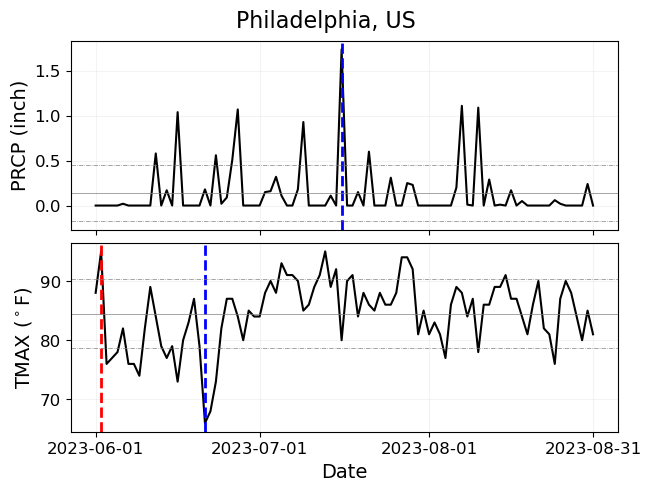

In [33]:
fig, [ax1, ax2] = plt.subplots(2, 1, layout='constrained', sharex=True)

# Select only x ticks and ticklabels at the start of each month
# Again, since the index of DATE_pa_full does not start from zero, 
# we need to retrieve the correct index labels to match our dates.
x_tlabels = ['2023-06-01', '2023-07-01', '2023-08-01', '2023-08-31']
mask = DATE_pa_full.isin(x_tlabels)
x_ticks = DATE_pa_full[mask].index.tolist()

## ------------- plot precipitation ------------ ##
ax1.plot(DATE_pa_full.index, PRCP_pa_full, color="black")
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tlabels, ha='center')
ax1.tick_params(axis='both', labelsize=12)
# ax1.set_xlabel('Date', size=14)
ax1.set_ylabel('PRCP (inch)', size=14)
ax1.grid(True, alpha=0.15)

# plot date with the maximum precipitation
ax1.axvline(x=PRCP_pa_full_max_idx, color='blue', linestyle='--', linewidth=2)

# Plot mean and mean +- one standard deviation of precipitation
ax1.axhline(y=PRCP_pa_full_mean, color='gray', linestyle='-', linewidth=0.5)
ax1.axhline(y=PRCP_pa_full_mean + PRCP_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)
ax1.axhline(y=PRCP_pa_full_mean - PRCP_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)

## ------------- plot daily maximum temperature ------------ ##
ax2.plot(DATE_pa_full.index, TMAX_pa_full, color="black")
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tlabels, ha='center')
ax2.tick_params(axis='both', labelsize=12)
ax2.set_xlabel('Date', size=14)
ax2.set_ylabel('TMAX ($^\circ$F)', size=14)
ax2.grid(True, alpha=0.15)

# plot date with the maximum and minimum daily maximum temperature
ax2.axvline(x=TMAX_pa_full_max_idx, color='red', linestyle='--', linewidth=2)
ax2.axvline(x=TMAX_pa_full_min_idx, color='blue', linestyle='--', linewidth=2)

# plot mean and mean +- one standard deviation of daily maximum temperature
ax2.axhline(y=TMAX_pa_full_mean, color='gray', linestyle='-', linewidth=0.5)
ax2.axhline(y=TMAX_pa_full_mean + TMAX_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)
ax2.axhline(y=TMAX_pa_full_mean - TMAX_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)

plt.suptitle("Philadelphia, US", size=16)

# Save plot
# plt.savefig('Philadelphia_US_PRCP_TMAX.png', format='png', dpi=600, bbox_inches='tight') 

Once again, what do you notice from this data?

Lastly, let’s plot the two cities together so we can see and compare how conditions vary between them.

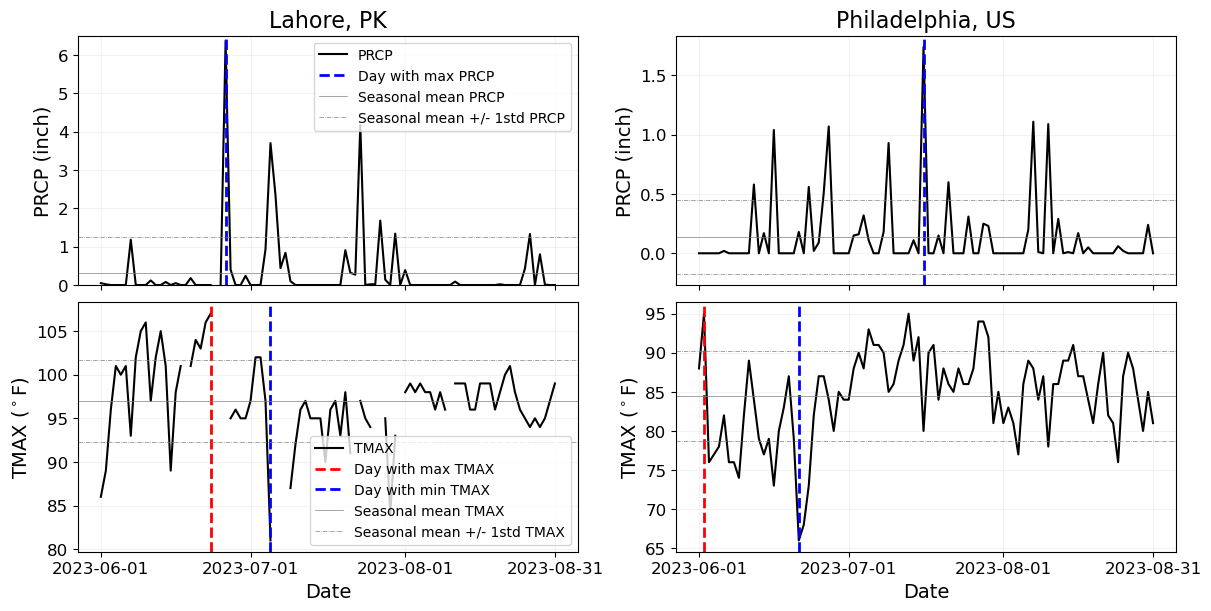

In [34]:
############### Plot Layout ############### 
# ax1: display PRCP in LAHORE CITY, PK
# ax2: display TMAX in LAHORE CITY, PK
# ax3: display PRCP in PHILADELPHIA, US
# ax4: display TMAX in PHILADELPHIA, US
fig, [[ax1,ax3],[ax2,ax4]] = plt.subplots(2, 2, figsize=(12,6), layout='constrained', sharex='col')

# Plot settings
titlesize = 16
labelsize = 12
size = 14
fontsize = 10

# Select only x ticks and ticklabels at the start of each month
x_ticks_pk = [0,30,61,91] 
x_tlabels_pk = [DATE_pk[k] for k in x_ticks_pk]

x_tlabels_pa = ['2023-06-01', '2023-07-01', '2023-08-01', '2023-08-31']
mask = DATE_pa_full.isin(x_tlabels_pa)
x_ticks_pa = DATE_pa_full[mask].index.tolist()

# To make y-axis consistent for the two stations:
# PRCP_pk_max:  6.37
# PRCP_pa_max:  1.74

# TMAX_pk_min:  81.0
# TMAX_pk_max:  107.0
# TMAX_pa_min:  66.0
# TMAX_pa_max:  95.0

######################### LAHORE CITY, PK #########################
## ------------- plot precipitation ------------ ##
ax1.plot(DATE_pk, PRCP_pk, color="black", label="PRCP")  
ax1.set_ylim(0, 6.5)
ax1.set_xticks(x_ticks_pk)
ax1.set_xticklabels(x_tlabels_pk, ha='center')
ax1.tick_params(axis='both', labelsize=labelsize)
ax1.set_ylabel('PRCP (inch)', size=size)
ax1.grid(True, alpha=0.15)

# plot date with the maximum precipitation
ax1.axvline(x=PRCP_pk_max_idx, color='blue', linestyle='--', linewidth=2, label="Day with max PRCP")

# plot mean and mean +- one standard deviation of precipitation
ax1.axhline(y=PRCP_pk_mean, color='gray', linestyle='-', linewidth=0.5, label="Seasonal mean PRCP")
ax1.axhline(y=PRCP_pk_mean + PRCP_pk_std, color='gray', linestyle='-.', linewidth=0.5, label="Seasonal mean +/- 1std PRCP")
ax1.axhline(y=PRCP_pk_mean - PRCP_pk_std, color='gray', linestyle='-.', linewidth=0.5)
ax1.set_title("Lahore, PK", size=titlesize)
ax1.legend(fontsize=fontsize)

## ------------- plot daily maximum temperature ------------ ##
ax2.plot(DATE_pk, TMAX_pk, color="black", label="TMAX")       
ax2.set_xticks(x_ticks_pk)
ax2.set_xticklabels(x_tlabels_pk, ha='center')
ax2.tick_params(axis='both', labelsize=labelsize)
ax2.set_xlabel('Date', size=size)
ax2.set_ylabel('TMAX ($^\circ$F)', size=size)
ax2.grid(True, alpha=0.15)

# plot date with the maximum and minimum daily maximum temperature
ax2.axvline(x=TMAX_pk_max_idx, color='red', linestyle='--', linewidth=2, label="Day with max TMAX")
ax2.axvline(x=TMAX_pk_min_idx, color='blue', linestyle='--', linewidth=2, label="Day with min TMAX")

# plot mean and mean +- one standard deviation of daily maximum temperature
ax2.axhline(y=TMAX_pk_mean, color='gray', linestyle='-', linewidth=0.5, label="Seasonal mean TMAX")
ax2.axhline(y=TMAX_pk_mean + TMAX_pk_std, color='gray', linestyle='-.', linewidth=0.5, label="Seasonal mean +/- 1std TMAX")
ax2.axhline(y=TMAX_pk_mean - TMAX_pk_std, color='gray', linestyle='-.', linewidth=0.5)
ax2.legend(fontsize=fontsize)

######################### PHILADELPHIA, US #########################
## ------------- plot precipitation ------------ ##
ax3.plot(DATE_pa_full.index, PRCP_pa_full, color="black")
ax3.set_xticks(x_ticks_pa)
ax3.set_xticklabels(x_tlabels_pa, ha='center')
ax3.tick_params(axis='both', labelsize=labelsize)
ax3.set_ylabel('PRCP (inch)', size=size)
ax3.grid(True, alpha=0.15)

# plot date with the maximum precipitation
ax3.axvline(x=PRCP_pa_full_max_idx, color='blue', linestyle='--', linewidth=2)

# Plot mean and mean +- one standard deviation of precipitation
ax3.axhline(y=PRCP_pa_full_mean, color='gray', linestyle='-', linewidth=0.5)
ax3.axhline(y=PRCP_pa_full_mean + PRCP_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)
ax3.axhline(y=PRCP_pa_full_mean - PRCP_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)
ax3.set_title("Philadelphia, US", size=titlesize)

## ------------- plot daily maximum temperature ------------ ##
ax4.plot(DATE_pa_full.index, TMAX_pa_full, color="black")
ax4.set_xticks(x_ticks_pa)
ax4.set_xticklabels(x_tlabels_pa, ha='center')
ax4.tick_params(axis='both', labelsize=labelsize)
ax4.set_xlabel('Date', size=size)
ax4.set_ylabel('TMAX ($^\circ$F)', size=size)
ax4.grid(True, alpha=0.15)

# plot date with the maximum and minimum daily maximum temperature
ax4.axvline(x=TMAX_pa_full_max_idx, color='red', linestyle='--', linewidth=2)
ax4.axvline(x=TMAX_pa_full_min_idx, color='blue', linestyle='--', linewidth=2)

# plot mean and mean +- one standard deviation of daily maximum temperature
ax4.axhline(y=TMAX_pa_full_mean, color='gray', linestyle='-', linewidth=0.5)
ax4.axhline(y=TMAX_pa_full_mean + TMAX_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)
ax4.axhline(y=TMAX_pa_full_mean - TMAX_pa_full_std, color='gray', linestyle='-.', linewidth=0.5)

# Save plot
# plt.savefig('Lahore_PK_Philadelphia_US_PRCP_TMAX.png', format='png', dpi=600, bbox_inches='tight') 

### Exercises

Hopefully by now, you’re feeling more comfortable working with pandas!

To check your understanding, try rerunning this tutorial using data from different cities.

Before you start, click Kernel → Restart & Clear Output to give yourself a clean slate.
Alternatively, you can simply copy and paste the code below to begin again with new data.